In [48]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

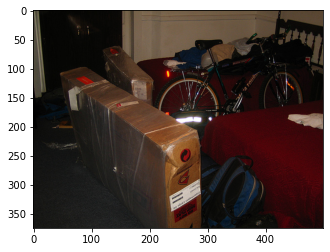

In [2]:
img = image.load_img('Dataset/Training/Bicycle/2015_00001.png')
plt.imshow(img)

In [3]:
image.img_to_array(img).shape

(375, 500, 3)

In [4]:
train = ImageDataGenerator(rescale = 1/255)
validate = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [5]:
X_train = train.flow_from_directory('Dataset\Training', 
                                   target_size= (100, 100),
                                   batch_size= 100)

X_validate = train.flow_from_directory('Dataset\Validation', 
                                   target_size= (100, 100),
                                   batch_size= 100)

Found 1440 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


In [6]:
X_train.class_indices

{'Bicycle': 0, 'Boat': 1, 'Cat': 2, 'Motorbike': 3, 'People': 4, 'Table': 5}

In [7]:
X_train.image_shape

(100, 100, 3)

In [79]:
model = Sequential([
    Conv2D(input_shape = (100, 100, 3),
          filters = 16,
          kernel_size = (3, 3),
          activation = 'relu'),
    
    MaxPool2D(pool_size = (2, 2),
             strides = 1),
    
    ##
    Conv2D(filters = 32,
          kernel_size = (3, 3),
          activation = 'relu'),
    
    MaxPool2D(pool_size = (2, 2),
             strides = 1),
    ##
    
    ##
 #   Conv2D(filters = 64,
 #         kernel_size = (3, 3),
 #         activation = 'relu'),
 #  
 #   MaxPool2D(pool_size = (2, 2),
 #           strides = 1),
   
    ##
    #Flattening
    
    Flatten(),
    
    #Dense Layer
    
    Dense(units = 10, activation= 'relu',  kernel_regularizer= regularizers.L2(0.05)),
    
    #output dense layer
    
    Dense(units = 6, activation= 'softmax')
])

In [80]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 97, 97, 16)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 95, 95, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 94, 94, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 282752)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2827530   
_________________________________________________________________
dense_21 (Dense)             (None, 6)               

In [81]:
## AUGMENTATION

In [82]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [83]:
model_fit = model.fit(X_train, steps_per_epoch=15, epochs=300, validation_data= X_validate)

Epoch 1/300
15/15 [==============================] - 46s 3s/step - loss: 3.3942 - accuracy: 0.1764 - val_loss: 2.2734 - val_accuracy: 0.1958
Epoch 2/300
15/15 [==============================] - 29s 2s/step - loss: 2.1612 - accuracy: 0.2243 - val_loss: 2.0437 - val_accuracy: 0.1688
Epoch 3/300
15/15 [==============================] - 29s 2s/step - loss: 1.9777 - accuracy: 0.2368 - val_loss: 1.9169 - val_accuracy: 0.1646
Epoch 4/300
15/15 [==============================] - 29s 2s/step - loss: 1.8836 - accuracy: 0.2333 - val_loss: 1.8569 - val_accuracy: 0.2062
Epoch 5/300
15/15 [==============================] - 29s 2s/step - loss: 1.8374 - accuracy: 0.2306 - val_loss: 1.8310 - val_accuracy: 0.2104
Epoch 6/300
15/15 [==============================] - 29s 2s/step - loss: 1.8184 - accuracy: 0.2097 - val_loss: 1.8217 - val_accuracy: 0.1833
Epoch 7/300
15/15 [==============================] - 29s 2s/step - loss: 1.8043 - accuracy: 0.2181 - val_loss: 1.8184 - val_accuracy: 0.1875
Epoch 8/300
1

Epoch 59/300
15/15 [==============================] - 29s 2s/step - loss: 0.6001 - accuracy: 0.9556 - val_loss: 4.1721 - val_accuracy: 0.2562
Epoch 60/300
15/15 [==============================] - 30s 2s/step - loss: 0.6470 - accuracy: 0.9396 - val_loss: 4.0129 - val_accuracy: 0.2729
Epoch 61/300
15/15 [==============================] - 38s 3s/step - loss: 0.6558 - accuracy: 0.9424 - val_loss: 4.3806 - val_accuracy: 0.2646
Epoch 62/300
15/15 [==============================] - 30s 2s/step - loss: 0.6062 - accuracy: 0.9653 - val_loss: 4.2575 - val_accuracy: 0.2833
Epoch 63/300
15/15 [==============================] - 28s 2s/step - loss: 0.5009 - accuracy: 0.9854 - val_loss: 4.3564 - val_accuracy: 0.2750
Epoch 64/300
15/15 [==============================] - 29s 2s/step - loss: 0.4621 - accuracy: 0.9833 - val_loss: 4.0962 - val_accuracy: 0.2937
Epoch 65/300
15/15 [==============================] - 29s 2s/step - loss: 0.4420 - accuracy: 0.9806 - val_loss: 3.9689 - val_accuracy: 0.2833
Epoch 

15/15 [==============================] - 29s 2s/step - loss: 0.5503 - accuracy: 0.9854 - val_loss: 4.7198 - val_accuracy: 0.2500
Epoch 117/300
15/15 [==============================] - 28s 2s/step - loss: 0.4528 - accuracy: 0.9924 - val_loss: 4.6402 - val_accuracy: 0.2375
Epoch 118/300
15/15 [==============================] - 30s 2s/step - loss: 0.3770 - accuracy: 0.9937 - val_loss: 4.3771 - val_accuracy: 0.2583
Epoch 119/300
15/15 [==============================] - 29s 2s/step - loss: 0.3170 - accuracy: 0.9944 - val_loss: 4.2228 - val_accuracy: 0.2562
Epoch 120/300
15/15 [==============================] - 29s 2s/step - loss: 0.2781 - accuracy: 0.9944 - val_loss: 4.0372 - val_accuracy: 0.2625
Epoch 121/300
15/15 [==============================] - 29s 2s/step - loss: 0.2475 - accuracy: 0.9951 - val_loss: 3.8772 - val_accuracy: 0.2562
Epoch 122/300
15/15 [==============================] - 30s 2s/step - loss: 0.2409 - accuracy: 0.9944 - val_loss: 3.9030 - val_accuracy: 0.2750
Epoch 123/300

15/15 [==============================] - 29s 2s/step - loss: 0.8998 - accuracy: 0.8861 - val_loss: 4.6004 - val_accuracy: 0.2542
Epoch 174/300
15/15 [==============================] - 29s 2s/step - loss: 0.7599 - accuracy: 0.9382 - val_loss: 4.8788 - val_accuracy: 0.2396
Epoch 175/300
15/15 [==============================] - 29s 2s/step - loss: 0.6548 - accuracy: 0.9604 - val_loss: 4.8040 - val_accuracy: 0.2375
Epoch 176/300
15/15 [==============================] - 29s 2s/step - loss: 0.5584 - accuracy: 0.9764 - val_loss: 4.7987 - val_accuracy: 0.2708
Epoch 177/300
15/15 [==============================] - 29s 2s/step - loss: 0.4613 - accuracy: 0.9861 - val_loss: 4.9206 - val_accuracy: 0.2479
Epoch 178/300
15/15 [==============================] - 29s 2s/step - loss: 0.3975 - accuracy: 0.9903 - val_loss: 4.9364 - val_accuracy: 0.2479
Epoch 179/300
15/15 [==============================] - 29s 2s/step - loss: 0.3429 - accuracy: 0.9917 - val_loss: 4.7931 - val_accuracy: 0.2521
Epoch 180/300

15/15 [==============================] - 29s 2s/step - loss: 0.6114 - accuracy: 0.9819 - val_loss: 5.5021 - val_accuracy: 0.2542
Epoch 231/300
15/15 [==============================] - 29s 2s/step - loss: 0.5179 - accuracy: 0.9917 - val_loss: 5.3256 - val_accuracy: 0.2604
Epoch 232/300
15/15 [==============================] - 29s 2s/step - loss: 0.4447 - accuracy: 0.9917 - val_loss: 5.3105 - val_accuracy: 0.2729
Epoch 233/300
15/15 [==============================] - 30s 2s/step - loss: 0.3779 - accuracy: 0.9937 - val_loss: 5.3256 - val_accuracy: 0.2708
Epoch 234/300
15/15 [==============================] - 30s 2s/step - loss: 0.3239 - accuracy: 0.9937 - val_loss: 5.0152 - val_accuracy: 0.2583
Epoch 235/300
15/15 [==============================] - 29s 2s/step - loss: 0.2805 - accuracy: 0.9931 - val_loss: 4.9136 - val_accuracy: 0.2625
Epoch 236/300
15/15 [==============================] - 30s 2s/step - loss: 0.2459 - accuracy: 0.9937 - val_loss: 4.7833 - val_accuracy: 0.2833
Epoch 237/300

15/15 [==============================] - 29s 2s/step - loss: 0.1557 - accuracy: 0.9951 - val_loss: 4.1684 - val_accuracy: 0.2271
Epoch 288/300
15/15 [==============================] - 29s 2s/step - loss: 0.1432 - accuracy: 0.9951 - val_loss: 4.0951 - val_accuracy: 0.2479
Epoch 289/300
15/15 [==============================] - 31s 2s/step - loss: 0.1305 - accuracy: 0.9951 - val_loss: 4.0635 - val_accuracy: 0.2646
Epoch 290/300
15/15 [==============================] - 32s 2s/step - loss: 0.1207 - accuracy: 0.9951 - val_loss: 3.9834 - val_accuracy: 0.2729
Epoch 291/300
15/15 [==============================] - 33s 2s/step - loss: 0.1147 - accuracy: 0.9951 - val_loss: 3.8975 - val_accuracy: 0.2562
Epoch 292/300
15/15 [==============================] - 39s 3s/step - loss: 0.1060 - accuracy: 0.9944 - val_loss: 3.8004 - val_accuracy: 0.2729
Epoch 293/300
15/15 [==============================] - 30s 2s/step - loss: 0.1249 - accuracy: 0.9896 - val_loss: 4.2027 - val_accuracy: 0.2667
Epoch 294/300

In [84]:
model_fit.history

{'loss': [3.394160032272339,
  2.1612088680267334,
  1.9776959419250488,
  1.8836147785186768,
  1.837446928024292,
  1.8184475898742676,
  1.804322600364685,
  1.8004604578018188,
  1.7957695722579956,
  1.7909209728240967,
  1.7757902145385742,
  1.7420746088027954,
  1.7229292392730713,
  1.6989532709121704,
  1.615969181060791,
  1.5479772090911865,
  1.524540901184082,
  1.484965205192566,
  1.374523401260376,
  1.383155107498169,
  1.2655425071716309,
  1.1987895965576172,
  1.168990969657898,
  1.0879274606704712,
  1.0208295583724976,
  1.0107829570770264,
  1.00356924533844,
  0.9303107261657715,
  0.8640599846839905,
  0.9503155946731567,
  0.9234786033630371,
  0.9650483727455139,
  0.8218857049942017,
  0.7868612408638,
  0.8021644353866577,
  0.9391087293624878,
  0.930609405040741,
  0.759807825088501,
  0.7340108156204224,
  0.6746674180030823,
  0.6717560887336731,
  0.6987601518630981,
  0.8130886554718018,
  0.7739388942718506,
  0.6727696061134338,
  0.62200552225112

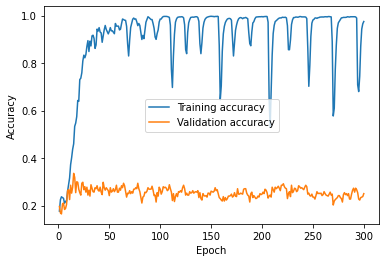

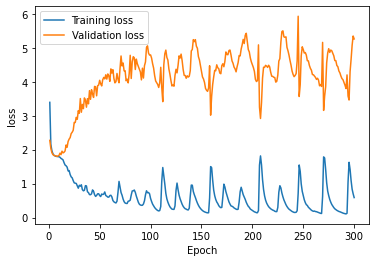

In [86]:
# Plot training and validation accuracy with respect to Epoch
epoch_range = range(1, 301)
plt.plot(epoch_range, model_fit.history['accuracy'])
plt.plot(epoch_range, model_fit.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

# Plot training and validation losses with respect to Epoch
plt.plot(epoch_range, model_fit.history['loss'])
plt.plot(epoch_range, model_fit.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()